# VGG Pretrained Model in Keras

In [2]:
import tensorflow as tf 
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import numpy as np 
import matplotlib.pyplot as plt 

# Downloading & loading the VGG16 Model

In [19]:
#Load the pre_trained VGG16 model from keras applications
model = VGG16(weights='imagenet')

# Display the model summary
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
from tensorflow.keras.applications import VGG19 

# Load the pre_trained VGG19 model from keras applications
model = VGG19(weights='imagenet')

# Display the model summary
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Prediction using the Pretrained Model

In [20]:
def predict_image(model, image_path):
    """
    Function to predict the class of an image using a pre-trained model.
    """
    # load the image with the required target size for VGG16 
    img = load_img(image_path, target_size=(224, 224))
    
    # convert the image to an array
    img_array = img_to_array(img)
    
    # expand the dimensions of the array to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)
    
    # preprocess the image
    img_array = preprocess_input(img_array)
    
    # make the prediction
    prediction = model.predict(img_array)
    
    # Decode the predictions into readable labels
    decoded_predictions = decode_predictions(prediction, top=5)
    
    # Return the first set of predictions (top 5)
    return decoded_predictions[0]    # ✅ FIXED


# Passing Images for Prediction

In [21]:
sample_image_path = "./download.jpeg"

# Predict the image class 
predictions = predict_image(model, sample_image_path)

# Display the predictions
print("Predictions")
for i,(imagenet_id, label, score) in enumerate(predictions):
    print(f"{i+1}: {label} ({score: .2f})")


1/1 [==============================] - 0s 269ms/step
Predictions
1: green_mamba ( 0.80)
2: green_snake ( 0.15)
3: garter_snake ( 0.03)
4: vine_snake ( 0.01)
5: Indian_cobra ( 0.01)


# Visualize the sample image

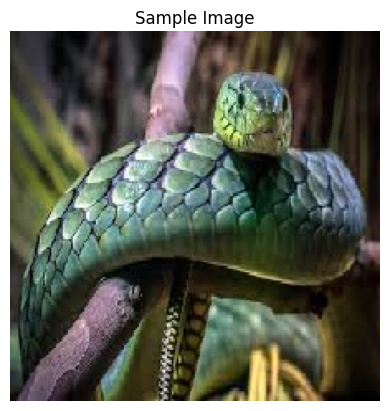

In [22]:
img = load_img(sample_image_path, target_size=(224,224))
plt.imshow(img)
plt.title('Sample Image')
plt.axis('off')
plt.show()